In [ ]:
# 1.Kütüphanelerin İçe Aktarılması
import pandas as pd
import numpy as np
import os

# 1.2.CSV Veri Setinin Yüklenmesi
data_path = '/content/test.csv'
train_df = pd.read_csv(data_path)

# 1.2.İlk birkaç satırı görüntüleme
print(train_df.head())

# 1.3.Toplam satır ve sütun sayısını yazdırma
print(f"Toplam Satır: {train_df.shape[0]}, Toplam Sütun: {train_df.shape[1]}")

# 1.4.Sütunlardaki veri türlerini ve eksik değerleri kontrol etme
print(train_df.info())
print(train_df.isnull().sum())

# 1.5.PatientId sütunundaki benzersiz hasta sayısını analiz etme
unique_patients = train_df['PatientId'].nunique()
print(f"Benzersiz Hasta Sayısı: {unique_patients}")


              Image  PatientId  Cardiomegaly  Emphysema  Effusion  Hernia  \
0  00021463_005.png      21463             0          0         1       1   
1  00019733_002.png      19733             0          0         0       1   
2  00021463_001.png      21463             0          0         0       1   
3  00017136_020.png      17136             0          0         0       1   
4  00027477_000.png      27477             0          0         0       1   

   Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  Pleural_Thickening  \
0             1     0       0            1             0                   0   
1             0     0       0            1             0                   0   
2             0     0       0            0             0                   0   
3             0     0       0            0             0                   0   
4             1     0       0            0             0                   0   

   Pneumonia  Fibrosis  Edema  Consolidation  
0        

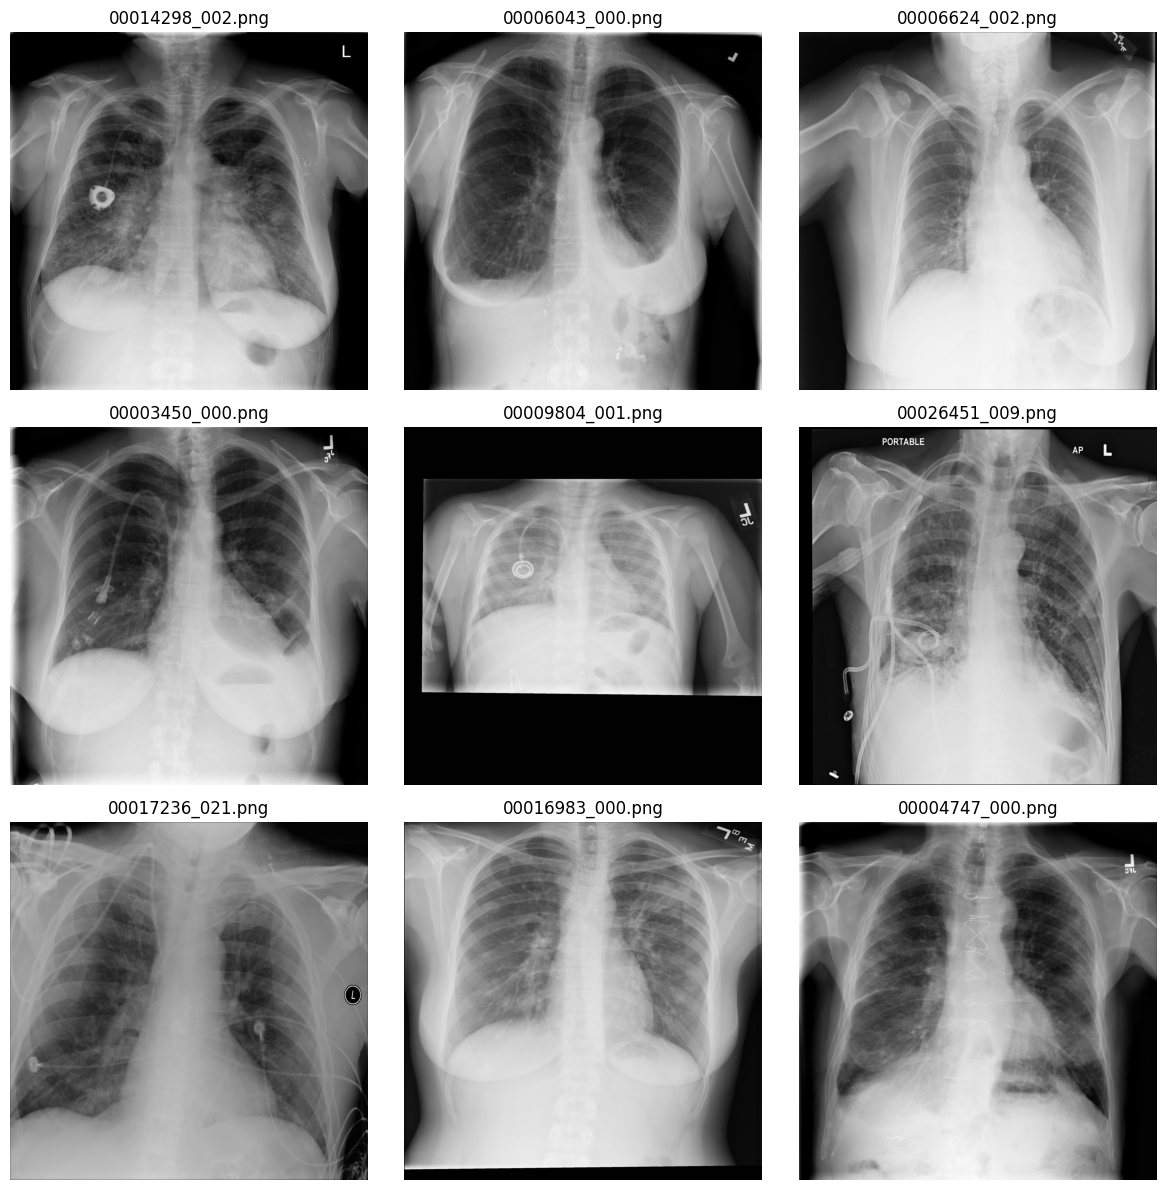

In [ ]:
# Gerekli Kütüphanelerin İçe Aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

plt.tight_layout()
plt.show()


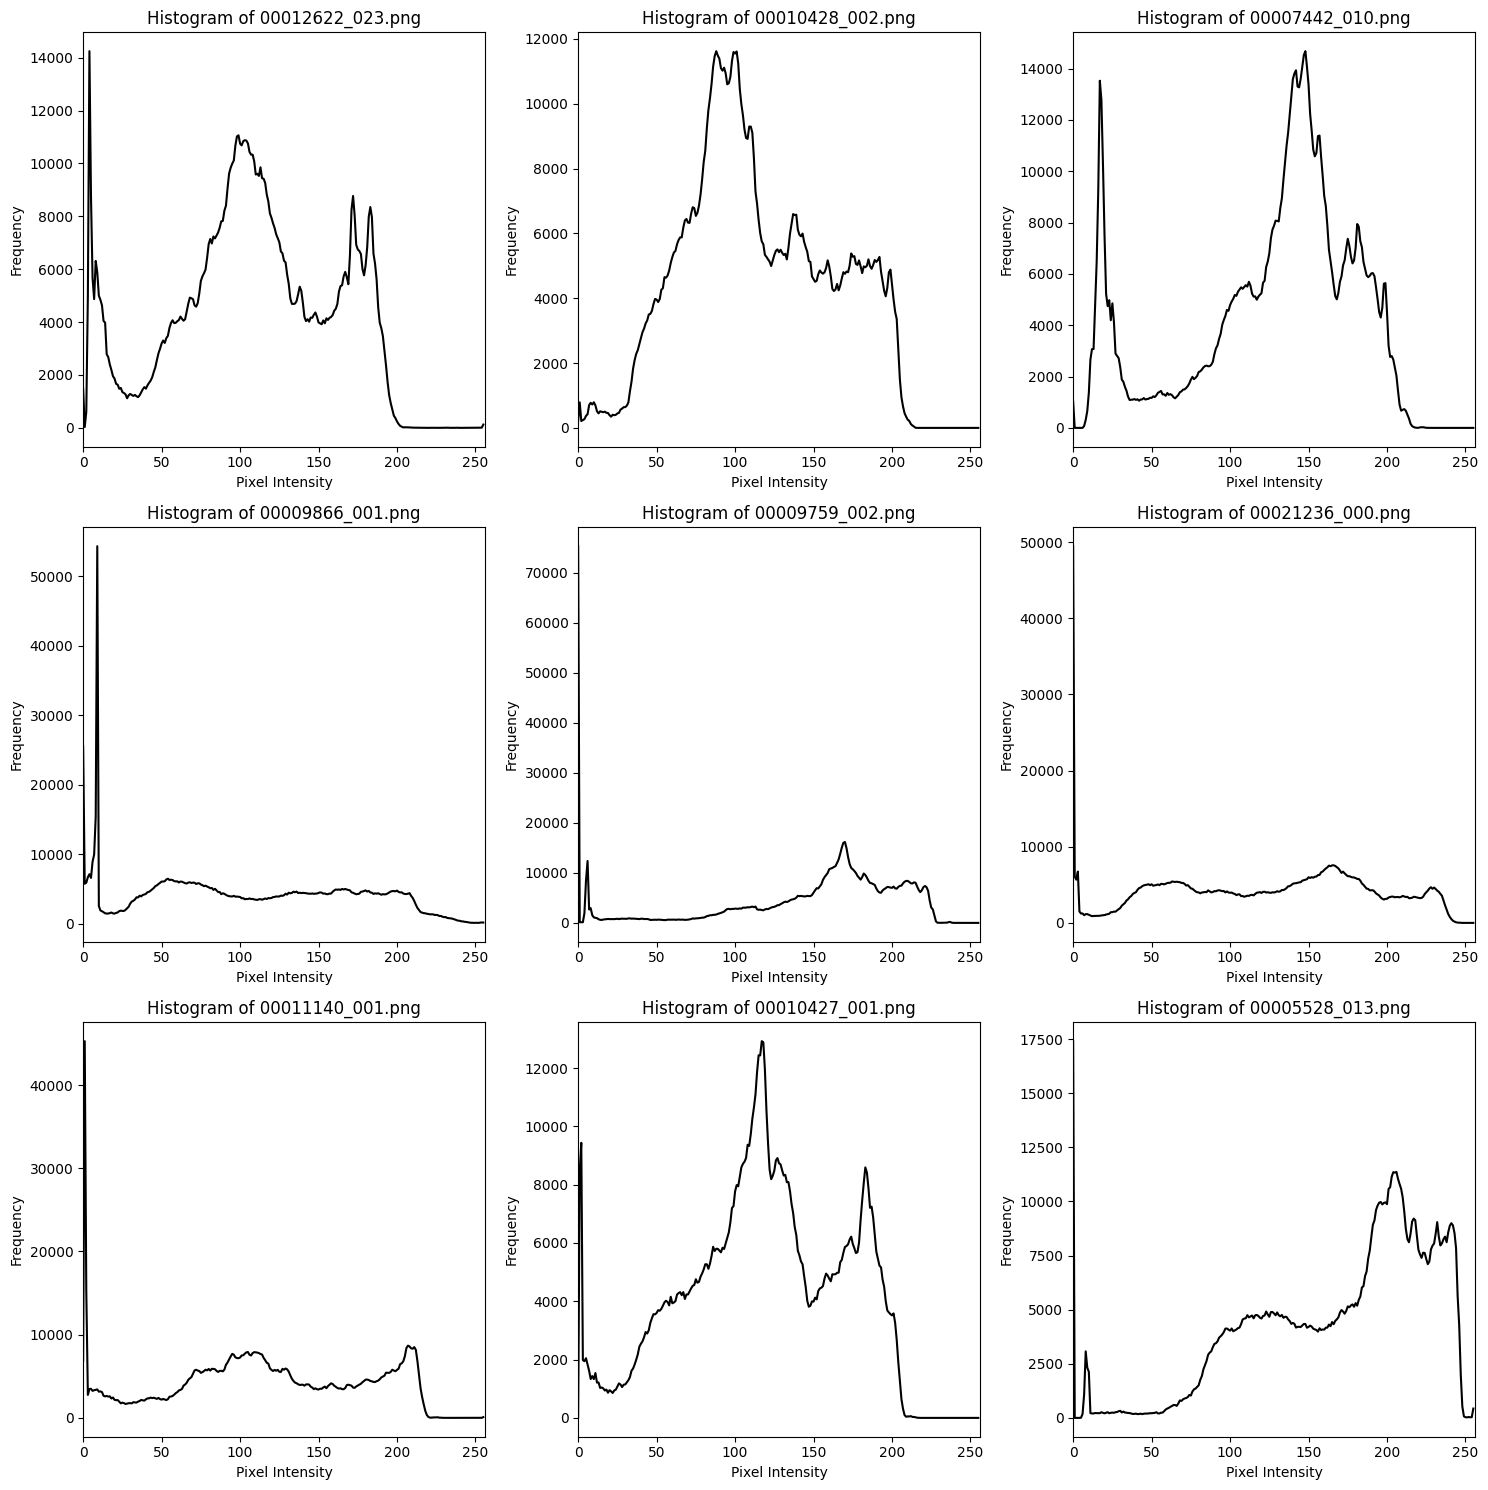

In [ ]:
# Gerekli Kütüphanelerin İçe Aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme
image_files = sample(list(train_df['Image']), 9)

# Histogramların Çizimi
def plot_histograms(image_folder, image_list):
    """
    Seçilen görüntülerin piksel yoğunluk histogramlarını çizer.

    Args:
    image_folder (str): Görüntülerin bulunduğu klasör yolu.
    image_list (list): Çizilecek görüntülerin isim listesi.
    """
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()  # 3x3 matris yerine tek boyutlu bir liste olarak işlemek için

    for idx, img_name in enumerate(image_list):
        # Görüntü Yükleme
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale olarak yükleniyor

        # Görüntü yüklenip yüklenmediğini kontrol et
        if img is not None:
            # Piksel yoğunluklarının histogramını hesapla
            hist = cv2.calcHist([img], [0], None, [256], [0, 256])

            # Histogramı çiz
            axes[idx].plot(hist, color='black')
            axes[idx].set_title(f"Histogram of {img_name}")
            axes[idx].set_xlim([0, 256])
            axes[idx].set_xlabel("Pixel Intensity")
            axes[idx].set_ylabel("Frequency")
        else:
            # Görüntü bulunamadığında uyarı mesajı
            axes[idx].text(0.5, 0.5, f"{img_name} not found",
                           horizontalalignment='center', verticalalignment='center',
                           transform=axes[idx].transAxes, color='red')
            axes[idx].set_axis_off()

    # Görsellerin düzenlenmesi
    plt.tight_layout()
    plt.show()

# Histogramları çizmek için fonksiyonu çağır
plot_histograms(image_path, image_files)


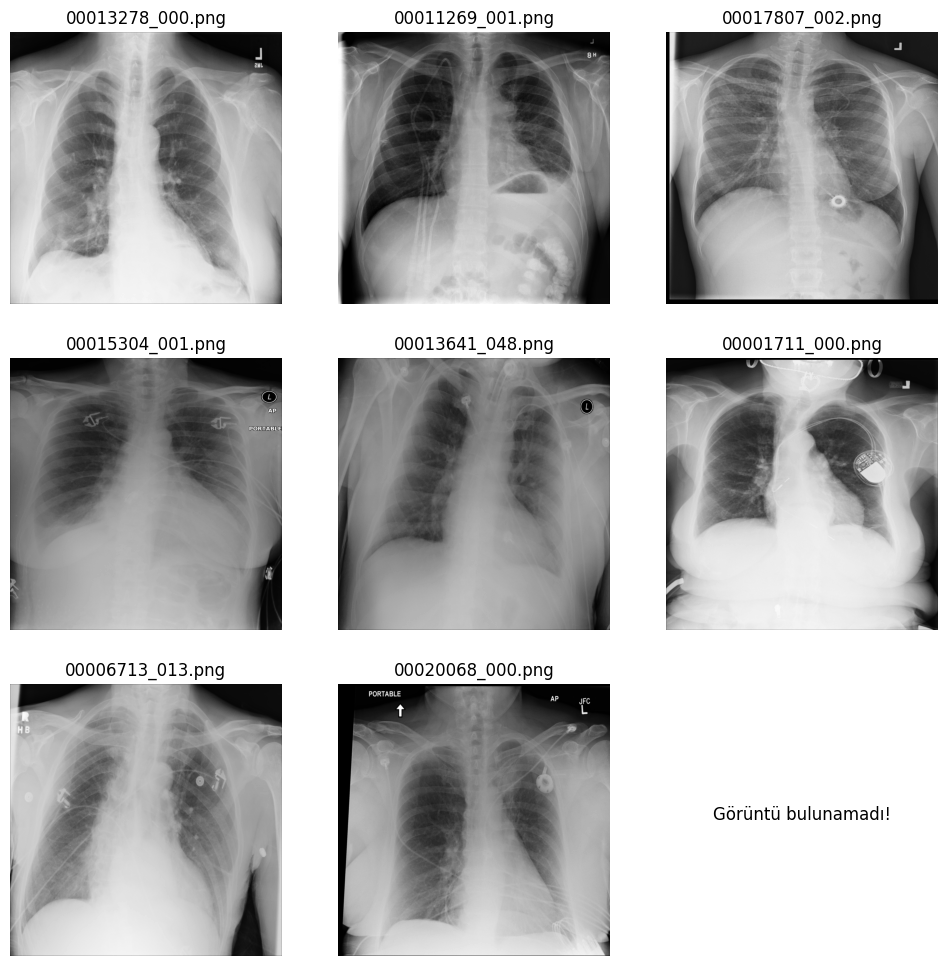

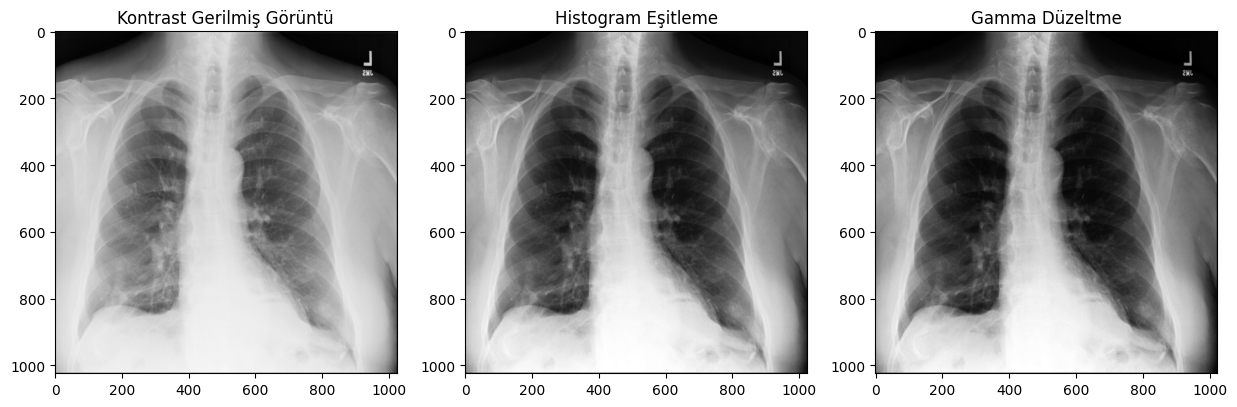

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

# Kontrast Germe
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

# Histogram Eşitleme
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Gamma Düzeltme
def gamma_correction(img, gamma=1.2):
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)

# Örnek Görüntü İyileştirme
sample_img = cv2.imread(os.path.join(image_path, image_files[0]), 0)
stretched_img = contrast_stretching(sample_img)
equalized_img = histogram_equalization(stretched_img)
gamma_img = gamma_correction(equalized_img)

# Görüntülerin Görselleştirilmesi
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(stretched_img, cmap='gray')
ax[0].set_title('Kontrast Gerilmiş Görüntü')
ax[1].imshow(equalized_img, cmap='gray')
ax[1].set_title('Histogram Eşitleme')
ax[2].imshow(gamma_img, cmap='gray')
ax[2].set_title('Gamma Düzeltme')
plt.show()



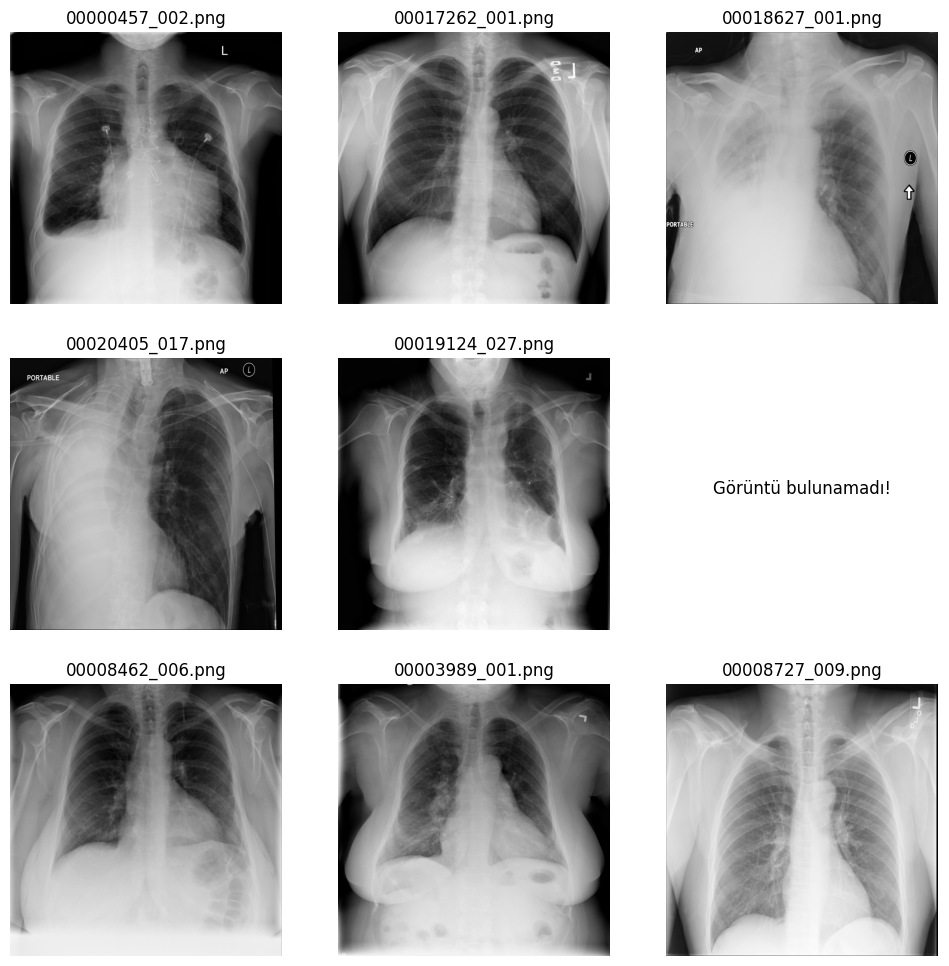

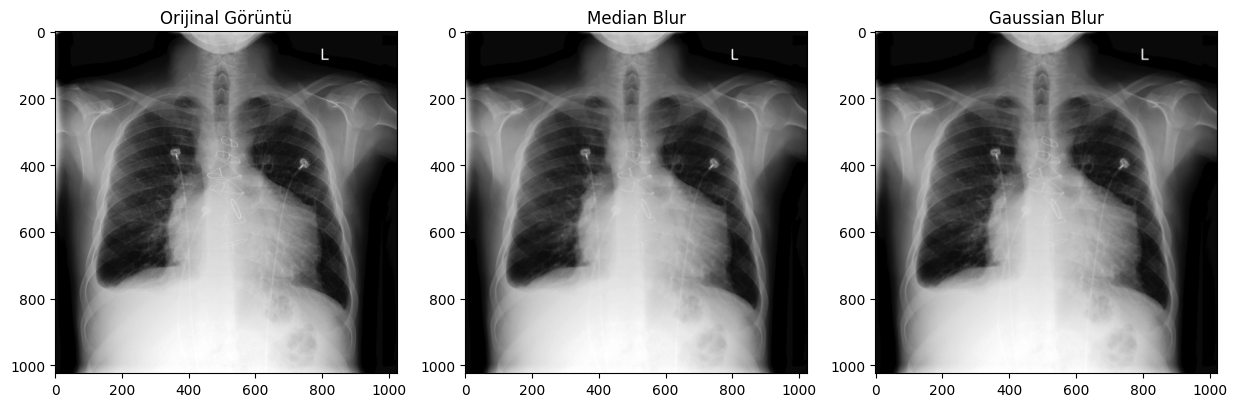

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

# Kontrast Germe
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

# Histogram Eşitleme
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Gamma Düzeltme
def gamma_correction(img, gamma=1.2):
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)

# Örnek Görüntü İyileştirme
sample_img = cv2.imread(os.path.join(image_path, image_files[0]), 0)
stretched_img = contrast_stretching(sample_img)
equalized_img = histogram_equalization(stretched_img)
gamma_img = gamma_correction(equalized_img)

# Median ve Gaussian Blur Uygulama
median_blur = cv2.medianBlur(gamma_img, 5)
gaussian_blur = cv2.GaussianBlur(gamma_img, (5, 5), 0)

# Sonuçların Görselleştirilmesi
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gamma_img, cmap='gray')
ax[0].set_title('Orijinal Görüntü')
ax[1].imshow(median_blur, cmap='gray')
ax[1].set_title('Median Blur')
ax[2].imshow(gaussian_blur, cmap='gray')
ax[2].set_title('Gaussian Blur')
plt.show()


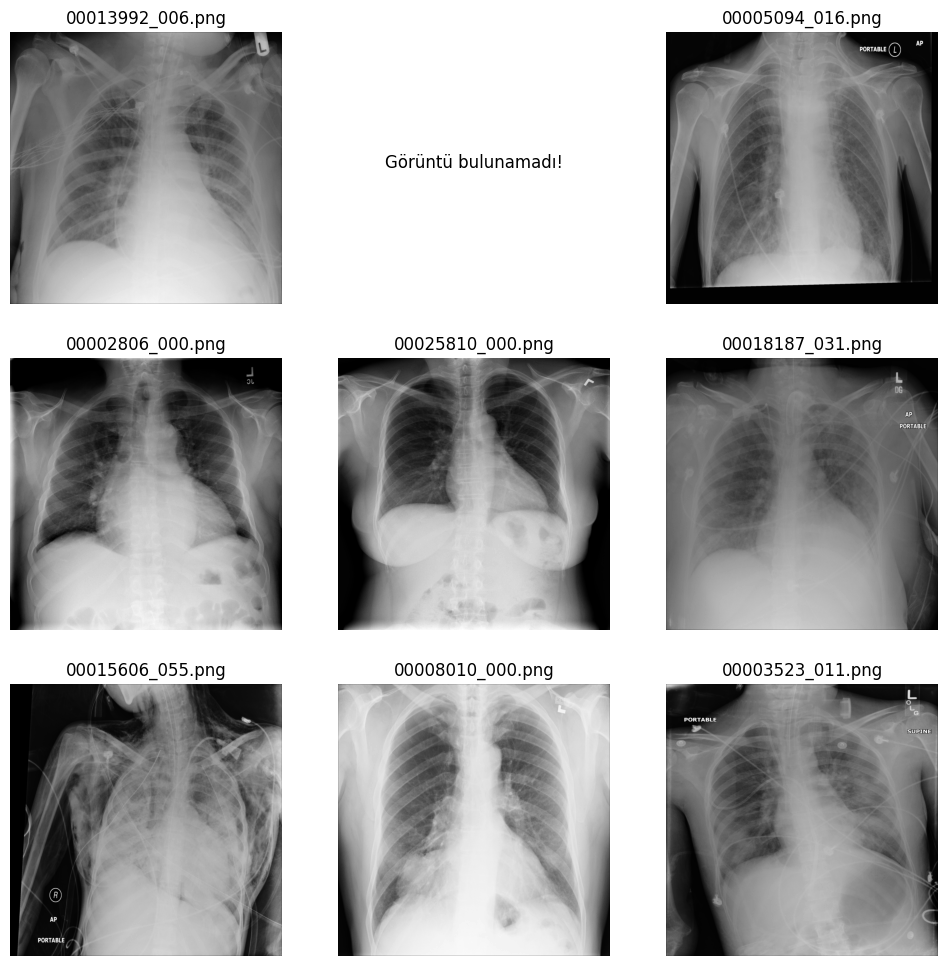

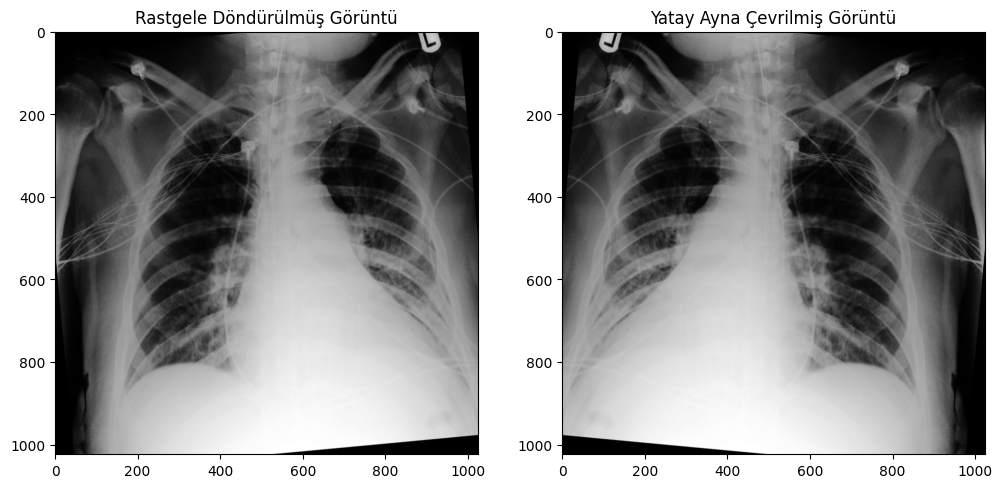

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

# Kontrast Germe
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

# Histogram Eşitleme
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Gamma Düzeltme
def gamma_correction(img, gamma=1.2):
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)

# Örnek Görüntü İyileştirme
sample_img = cv2.imread(os.path.join(image_path, image_files[0]), 0)
stretched_img = contrast_stretching(sample_img)
equalized_img = histogram_equalization(stretched_img)
gamma_img = gamma_correction(equalized_img)

# Görüntüyü 0-10 Derece Rastgele Döndürme
def random_rotate(img):
    angle = np.random.uniform(0, 10)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

rotated_img = random_rotate(gamma_img)

# Yatay Ayna Çevirme
flipped_img = cv2.flip(rotated_img, 1)

# Görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rotated_img, cmap='gray')
ax[0].set_title('Rastgele Döndürülmüş Görüntü')
ax[1].imshow(flipped_img, cmap='gray')
ax[1].set_title('Yatay Ayna Çevrilmiş Görüntü')
plt.show()


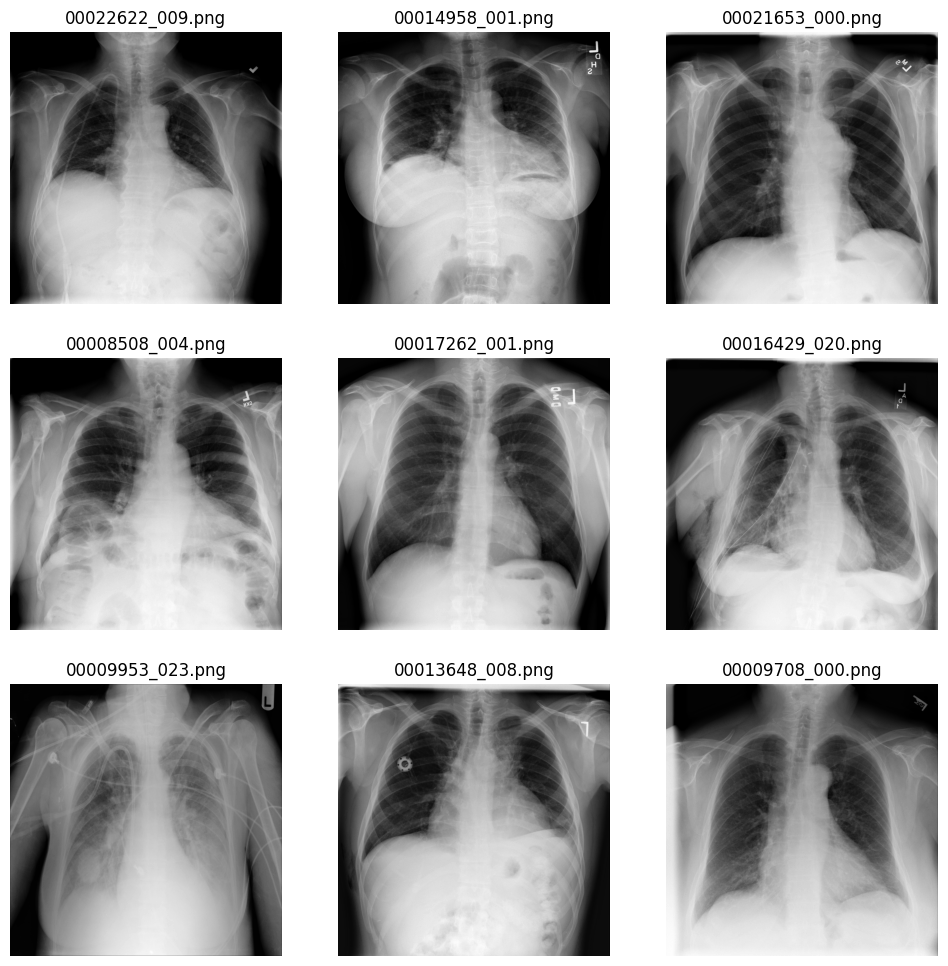

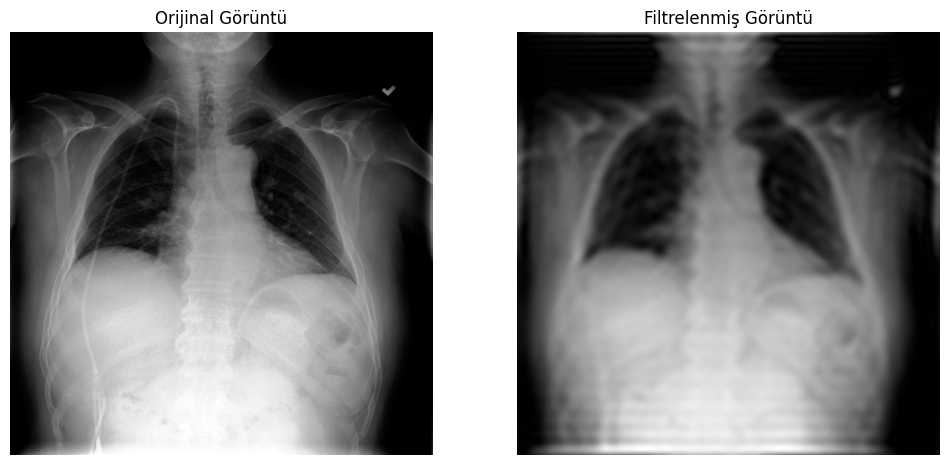

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

# Kontrast Germe
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

# Histogram Eşitleme
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Gamma Düzeltme
def gamma_correction(img, gamma=1.2):
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)

# Örnek Görüntü İyileştirme
sample_img = cv2.imread(os.path.join(image_path, image_files[0]), 0)
stretched_img = contrast_stretching(sample_img)
equalized_img = histogram_equalization(stretched_img)
gamma_img = gamma_correction(equalized_img)

# Fourier Dönüşümü ve Filtreleme
dft = np.fft.fft2(gamma_img)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

rows, cols = gamma_img.shape
crow, ccol = rows // 2, cols // 2

# Düşük Frekans Geçiren Maske
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

filtered_dft = dft_shift * mask
f_ishift = np.fft.ifftshift(filtered_dft)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(gamma_img, cmap='gray')
plt.title('Orijinal Görüntü'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.title('Filtrelenmiş Görüntü'), plt.axis('off')
plt.show()


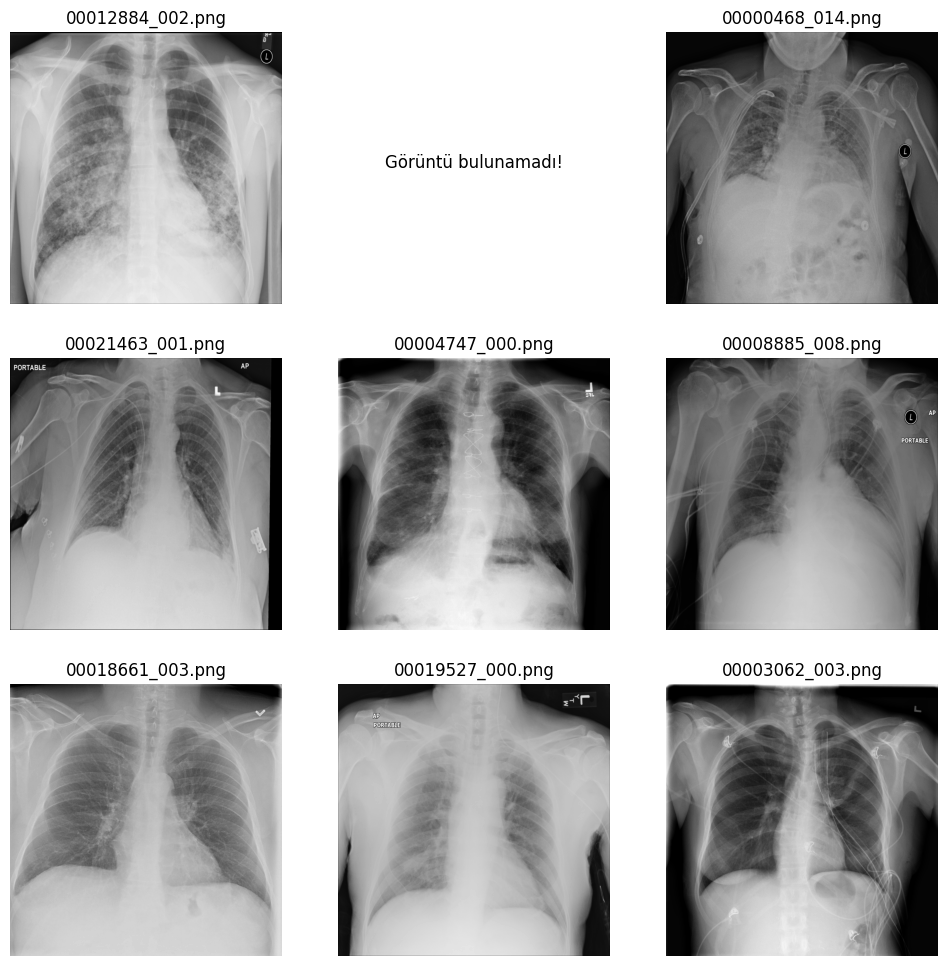

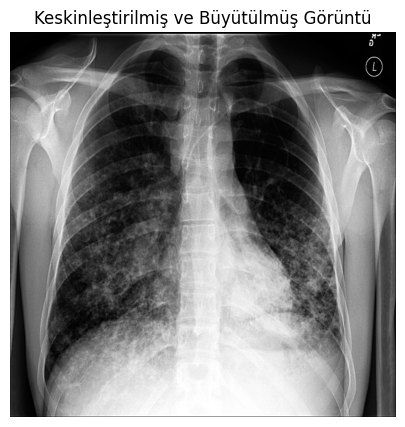

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from random import sample

# Veri Yolu ve Görüntü Dosyaları
data_path = '/content/test.csv'
image_path = '/content/images_small'

# CSV Veri Setinin Yüklenmesi
train_df = pd.read_csv(data_path)

# Rastgele 9 Görüntü Seçme ve Görselleştirme
image_files = sample(list(train_df['Image']), 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, img_name in enumerate(image_files):
    # Görüntü Yükleme
    img_path = os.path.join(image_path, img_name)
    img = cv2.imread(img_path, 0)

    # Görüntü yüklenip yüklenmediğini kontrol et
    if img is not None:
        axes[idx // 3, idx % 3].imshow(img, cmap='gray')
        axes[idx // 3, idx % 3].set_title(img_name)
    else:
        axes[idx // 3, idx % 3].text(0.5, 0.5, 'Görüntü bulunamadı!',
                                     fontsize=12, ha='center')

    axes[idx // 3, idx % 3].axis('off')

# Kontrast Germe
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

# Histogram Eşitleme
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Gamma Düzeltme
def gamma_correction(img, gamma=1.2):
    img = img / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)

# Örnek Görüntü İyileştirme
sample_img = cv2.imread(os.path.join(image_path, image_files[0]), 0)
stretched_img = contrast_stretching(sample_img)
equalized_img = histogram_equalization(stretched_img)
gamma_img = gamma_correction(equalized_img)

# Unsharp Masking Keskinleştirme
blur = cv2.GaussianBlur(gamma_img, (9, 9), 10)
sharpened = cv2.addWeighted(gamma_img, 1.5, blur, -0.5, 0)

# Bicubic Enterpolasyon
resized_img = cv2.resize(sharpened, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(resized_img, cmap='gray')
plt.title('Keskinleştirilmiş ve Büyütülmüş Görüntü')
plt.axis('off')
plt.show()
